In [2]:
from sklearn.datasets import load_breast_cancer

In [8]:
breast = load_breast_cancer()

In [9]:
breast_data = breast.data

In [10]:
breast_data.shape

(569, 30)

In [11]:
breast_labels = breast.target

In [12]:
breast_labels.shape

(569,)

In [13]:
import numpy as np

In [14]:
labels = np.reshape(breast_labels,(569,1))

In [16]:
final_breast_data = np.concatenate([breast_data,labels],axis = 1)

In [17]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

In [20]:
features = breast.feature_names

In [21]:
features_labels = np.append(features,'label')

In [22]:
breast_dataset.columns = features_labels

In [23]:
breast_dataset['label'].replace(0, 'Bengin',inplace = True)
breast_dataset['label'].replace(1,'Malignant',inplace = True)

C:\Users\sies\AppData\Local\Temp\ipykernel_1968\2762584900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Bengin',inplace = True)


In [24]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:,features].values
x = StandardScaler().fit_transform(x)

In [25]:
np.mean(x),np.std(x)

(np.float64(-6.826538293184326e-17), np.float64(1.0))

In [26]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [27]:
normalised_breast = pd.DataFrame(x,columns = feat_cols)

In [28]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components = 2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_DF = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1','principal component 2'])

In [30]:
print(format(pca_breast.explained_variance_ratio_))

[0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

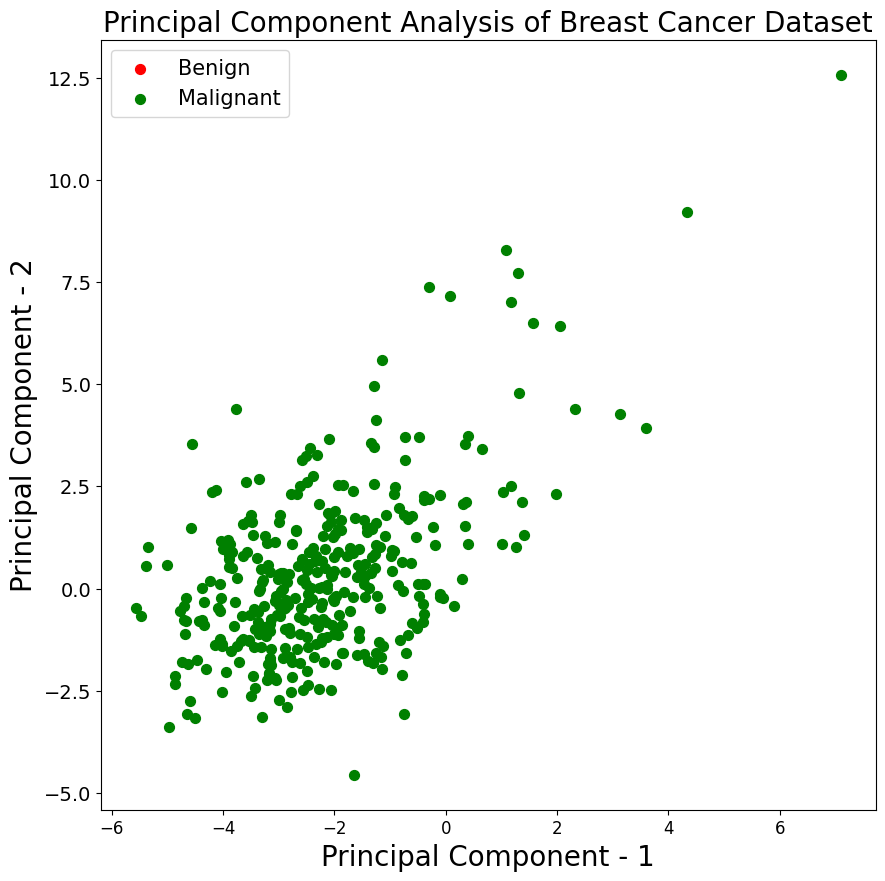

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_DF.loc[indicesToKeep, 'principal component 1']
               , principal_breast_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})